In [182]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import albumentations as A

from glob import glob
from tqdm import tqdm


In [183]:
dermalog_root = '../data/Dermalog'
greenbit_root = '../data/Greenbit'

In [204]:
dermalog_fake = sorted(glob(f'{dermalog_root}/*/FAKE/*.jpg'))
demalog_live = sorted(glob(f'{dermalog_root}/*/LIVE/*.jpg'))
greenbit_fake = sorted(glob(f'{greenbit_root}/*/FAKE/*.jpg'))
greenbit_live = sorted(glob(f'{greenbit_root}/*/LIVE/*.jpg'))

In [205]:
def select_random_image(image_list):
    return random.choice(image_list)

In [208]:
def augment_image(image_path):
    image = cv2.imread(image_path)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    augment = A.Compose([
        A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=0.3, brightness_by_max=True, p=0.5),
        # A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0, brightness_by_max=True, p=0.5),
        # A.Sharpen(alpha=(0.5, 0.5), lightness=(1, 1),p=1),
        # A.MedianBlur(blur_limit=(5, 5), p=1),
    ])

    augmented_image = augment(image=image)['image']
    return image, augmented_image

d:\AIM\Competition\2023\LivDet2023\.venv\lib\site-packages\albumentations\augmentations\transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


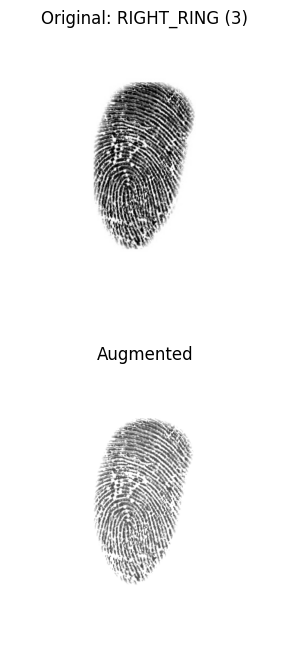

In [209]:
random.seed(42)
np.random.seed(42)

selected_images = [select_random_image(image_list) for image_list in [dermalog_fake, demalog_live, greenbit_fake, greenbit_live]]

plt.figure(figsize=(16, 8))
for i, image_path in enumerate(selected_images, 1):
    image_path = image_path.replace('\\', '/')
    original_image, augmented_image = augment_image(image_path)

    save_path = '../analysis_results/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    basename = os.path.basename(image_path).split('.')[0]
    cv2.imwrite(os.path.join(save_path, f'{basename}_original.jpg'), cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(save_path, f'{basename}_augmented.jpg'), cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

    plt.subplot(2, 4, i)
    plt.title(f'Original: {basename}')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(2, 4, i + 4)
    plt.title('Augmented')
    plt.imshow(augmented_image)
    plt.axis('off')
    break
plt.show()
